# Akshay Bhala
### Extra Credit Assignment
05/08/2020<br>

Introduction: Predicting whether the quality of wine is bad , average or good.<br>
Link to the data set :<BR>
https://archive.ics.uci.edu/ml/datasets/wine+quality


In [0]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Analysis :** No Null Values

In [4]:
df = df.drop_duplicates()
df.shape

(1359, 12)

**Analysis :** Removed 240 duplicate values

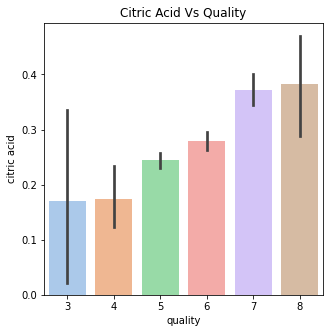

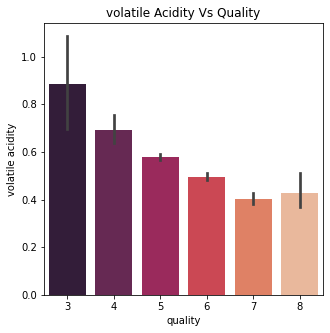

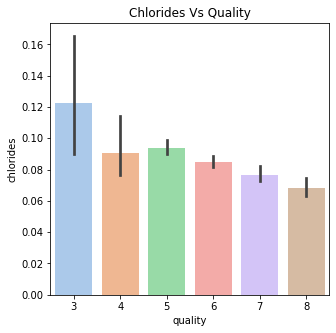

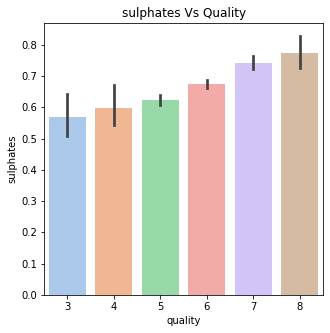

In [5]:
plot = plt.figure(figsize=(5,5))
plt.title("Citric Acid Vs Quality")
sns.barplot(data=df,x="quality",y="citric acid",palette="pastel")

plot = plt.figure(figsize=(5,5))
plt.title("volatile Acidity Vs Quality")
sns.barplot(data=df,x="quality",y="volatile acidity",palette="rocket")

plot = plt.figure(figsize=(5,5))
plt.title("Chlorides Vs Quality")
sns.barplot(data=df,x="quality",y="chlorides",palette="pastel")

plot = plt.figure(figsize=(5,5))
plt.title("sulphates Vs Quality")
sns.barplot(data=df,x="quality",y="sulphates",palette="pastel")

**Analysis :** Both citric acid and sulphates increases as the quality increases whereas chlorides and volatile acidity decreases as quality increases.

<Figure size 360x360 with 0 Axes>

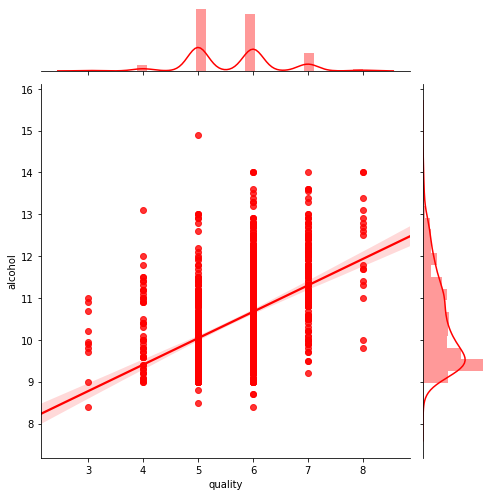

In [6]:
plot = plt.figure(figsize=(5,5))

sns.jointplot(data=df,x="quality",y="alcohol", kind="reg", truncate=False,
                  
                  color="r", height=7)

**Analysis :** Content of Alcohol increases as quality increases

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


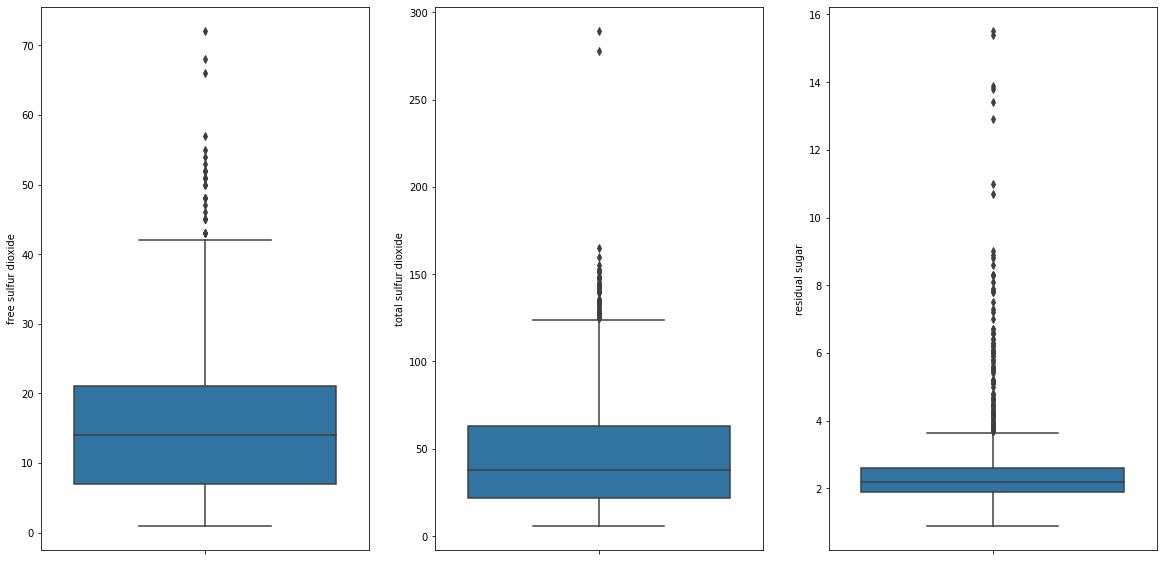

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(y= df['free sulfur dioxide'])

plt.subplot(1,3,2)
sns.boxplot(y=df['total sulfur dioxide'])

plt.subplot(1,3,3)
sns.boxplot(y=df['residual sugar'])

plt.show()

**Analysis :** After looking at data distribution i found there are some outliers which i treated using inter quartile range.

In [0]:
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]
df = outliers_IQR(df, 'free sulfur dioxide')
df = outliers_IQR(df, 'total sulfur dioxide')
df = outliers_IQR(df, 'residual sugar')
df = outliers_IQR(df, 'fixed acidity')

In [10]:
df.groupby("quality")["quality"].count()

quality
3      8
4     44
5    476
6    475
7    135
8     14
Name: quality, dtype: int64

Grouping Quality into Good and Bad i.e a classification problem




In [0]:
bins =(2,5,8)
names =["bad","good"]
df["quality"] = pd.cut(df["quality"],bins=bins,labels=names)

In [12]:
df.groupby("quality")["quality"].count()

quality
bad     528
good    624
Name: quality, dtype: int64

One hot encoding aand splitting into train and test

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["quality"] = le.fit_transform(df["quality"])
X=df.drop("quality",axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
ns_probs = [0 for _ in range(len(y_test))]

## Machine Learning Models

1. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,predictions))
print("\n Classification Report \n",classification_report(y_test,predictions))


 Confusion Matrix 
 [[106  54]
 [ 38 148]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       160
           1       0.73      0.80      0.76       186

    accuracy                           0.73       346
   macro avg       0.73      0.73      0.73       346
weighted avg       0.73      0.73      0.73       346



In [29]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=5)
grid = grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 200}


In [30]:
print("\n Confusion Matrix \n",confusion_matrix(y_test,grid_predictions))
print("\n Classification Report \n",classification_report(y_test,grid_predictions))


 Confusion Matrix 
 [[109  51]
 [ 37 149]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       160
           1       0.74      0.80      0.77       186

    accuracy                           0.75       346
   macro avg       0.75      0.74      0.74       346
weighted avg       0.75      0.75      0.74       346



In [34]:
tune1 = pd.DataFrame(data=None, index= ['RF','RF_Best'],columns=['Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune1['Accuracy']=  [0.73,0.75]
tune1['Precision']= [0.73,0.75]
tune1['Recall']=    [0.73,0.74]
tune1['F1_Score']=  [0.73,0.74]
tune1['Hyper_Parameters']= [['max_depth = None','n_estimator = 100','bootstrap = True', 'max_features = auto','min_samples_leaf = 1', 'min_samples_split = 2'],['max_depth = 50','n_estimator = 200','bootstrap = True', 'max_features = 2','min_samples_leaf = 3', 'min_samples_split = 12']]
tune1

,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
RF,0.73,0.73,0.73,0.73,"[max_depth = None, n_estimator = 100, bootstra..."
RF_Best,0.75,0.75,0.74,0.74,"[max_depth = 50, n_estimator = 200, bootstrap ..."


**Analysis:**  A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably. max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. As Depth increases there is a chance of overfitting. min_samples_split represents the minimum number of samples required to split an internal node.When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. There is a chance of underfitting when we require all of the sample at each node.min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.Increasing this value can cause underfitting.max_features represents the number of features to consider when looking for the best split. As this value increases there is a chance of overfitting. After tuning random forest model the accuracy remained constant at 73% but recall and f1 score increased by 1% which is now 74%.

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.818


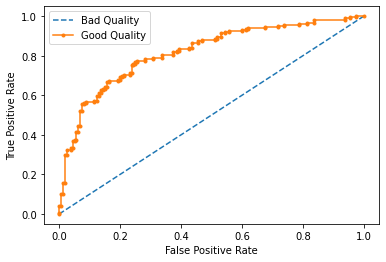

In [18]:
lr_probs = grid.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Bad Quality')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Good Quality')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** The Roc curve with an auc score of 0.818 proves that our model is a good fit

2. SVM

In [19]:
from sklearn.svm import SVC
svm_L = SVC()
svm_L.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
predictions = svm_L.predict(X_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,predictions))
print("\n Classification report \n",classification_report(y_test,predictions))


 Confusion Matrix 
 [[ 46 114]
 [ 18 168]]

 Classification report 
               precision    recall  f1-score   support

           0       0.72      0.29      0.41       160
           1       0.60      0.90      0.72       186

    accuracy                           0.62       346
   macro avg       0.66      0.60      0.56       346
weighted avg       0.65      0.62      0.58       346



In [21]:
param_grid = {'C': [0.1,1,10], 'kernel': ['linear','rbf'],'probability' : [True]} 
grid = GridSearchCV(SVC(),param_grid,n_jobs=3)
grid = grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print("\n Best Parameters \n",grid.best_params_)


 Best Parameters 
 {'C': 10, 'kernel': 'linear', 'probability': True}


In [22]:
predictions = grid.predict(X_test)
print("\n Confusion Matrix \n",confusion_matrix(y_test,grid_predictions))
print("\n Classification report \n",classification_report(y_test,grid_predictions))


 Confusion Matrix 
 [[118  42]
 [ 44 142]]

 Classification report 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       160
           1       0.77      0.76      0.77       186

    accuracy                           0.75       346
   macro avg       0.75      0.75      0.75       346
weighted avg       0.75      0.75      0.75       346



In [35]:
tune1 = pd.DataFrame(data=None, index= ['SVC','SVC_Best'],columns=['Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune1['Accuracy']=  [0.62,0.75]
tune1['Precision']= [0.66,0.75]
tune1['Recall']=    [0.60,0.75]
tune1['F1_Score']=  [0.56,0.75]
tune1['Hyper_Parameters']= [['C = 1','kernel = rbf'],['C = 10', 'kernel = linear']]
tune1

,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
SVC,0.62,0.66,0.60,0.56,"[C = 1, kernel = rbf]"
SVC_Best,0.75,0.75,0.75,0.75,"[C = 10, kernel = linear]"


**Analysis:**  C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. Increasing C values may lead to overfitting the training data. As we go beyond C = 10 there is a chance of overfitting. As i hypertuned both kernel and penalty parameter the model showed significant improvent i.e accuracy increased from 62% to 75% as well as f1 has increased from 56% to 75% and as the dataset is balanced i am using accuracy as the performance metric.

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.823


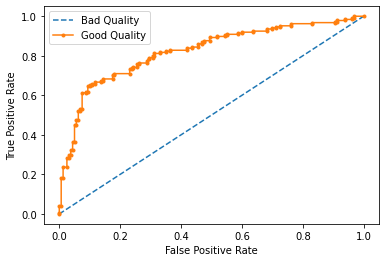

In [23]:
lr_probs = grid.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Bad Quality')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Good Quality')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Analysis:** The roc curve shows that our model is a good fit and has an auc score of 0.823

In [37]:
tune1 = pd.DataFrame(data=None, index= ['RF_Best','SVC_Best'],columns=['Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune1['Accuracy']=  [0.75,0.75]
tune1['Precision']= [0.75,0.75]
tune1['Recall']=    [0.74,0.75]
tune1['F1_Score']=  [0.74,0.75]
tune1['Hyper_Parameters']= [['max_depth = 50','n_estimator = 200','bootstrap = True', 'max_features = 2','min_samples_leaf = 3', 'min_samples_split = 12'],['C = 10', 'kernel = linear']]
tune1

,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
RF_Best,0.75,0.75,0.74,0.74,"[max_depth = 50, n_estimator = 200, bootstrap ..."
SVC_Best,0.75,0.75,0.75,0.75,"[C = 10, kernel = linear]"


**Analysis:** Both the machine learning models showed same  accuracy which is 75%. Hence i used random forest for getting feature importance.

# Feature Importance

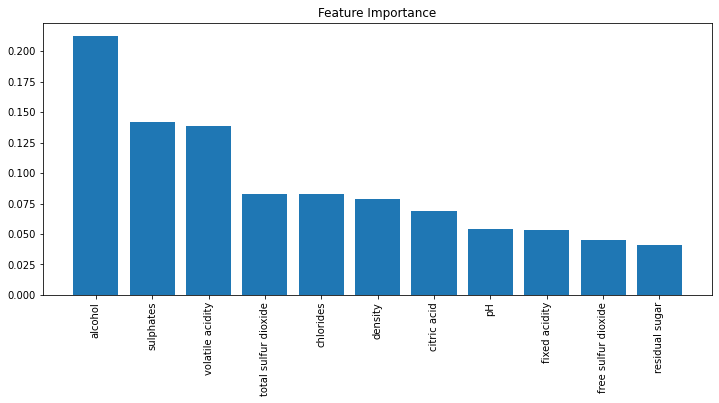

In [24]:
rf = RandomForestClassifier(bootstrap=True,max_depth=50,max_features=2,min_samples_leaf=5,min_samples_split=10,n_estimators=200)
model = rf.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X.columns) 
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(12,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

**Analysis:** Alcohol, Sulphates, and volatile acidity are the 3 most important features used to predict the quality of wine.